# Support Vector Machine (SVM)

[[118  12]
 [ 25  37]]

Kernel: linear
Accuracy: 80.72916666666666


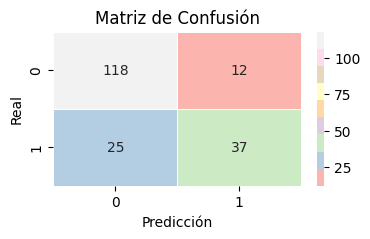

[[116  14]
 [ 36  26]]

Kernel: rbf
Accuracy: 73.95833333333334


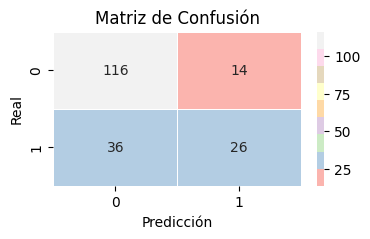

[[116  14]
 [ 43  19]]

Kernel: poly
Accuracy: 70.3125


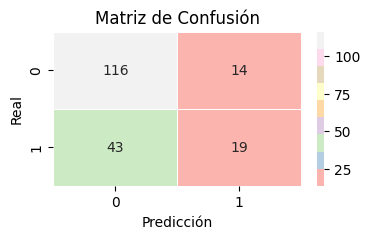

[[118  12]
 [ 25  37]]

Kernel: sigmoid
Accuracy: 80.72916666666666


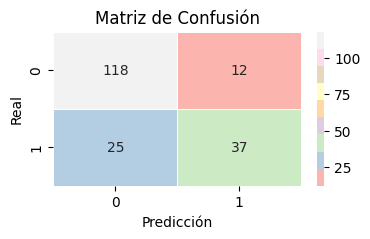

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

dataset = pd.read_csv('diabetes.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

kernels_to_try = [
    {'kernel': 'linear', 'C': 100},
    {'kernel': 'rbf', 'gamma': 1, 'C': 1},
    {'kernel': 'poly', 'degree': 2, 'C': 1},
    {'kernel': 'sigmoid', 'gamma': 0.01012358746945651, 'C':21.37673701215538}
]

for kernel_config in kernels_to_try:
    kernel = kernel_config['kernel']
    classifier = SVC(random_state=0, **kernel_config)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(cm)
    print(f"\nKernel: {kernel}")
    print("Accuracy:", accuracy * 100)
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Pastel1", linewidths=.5)
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()


In [74]:
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [0.1, 1, 5, 10, 20, 50, 70, 100], 'kernel': ['linear']},
              {'C': [0.1, 1, 5, 10, 20, 50, 70, 100], 'kernel': ['rbf'], 'gamma': [1, 0.2, 0.1, 0.01]},
              {'C': [0.1, 1, 5, 10, 20, 50, 70, 100], 'kernel': ['poly'], 'degree': [2, 3, 4]},
              {'C': [0.1, 1, 5, 10, 20, 50, 70, 100], 'kernel': ['sigmoid'], 'gamma': [1, 0.2, 0.1, 0.01]}
]

X_train = sc.fit_transform(X_train)

svm_classifier = SVC(random_state=2)
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=4)
grid_search = grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)
best_accuracy = grid_search.best_score_
print("Mejor precisión:", best_accuracy)

Mejores hiperparámetros: {'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}
Mejor precisión: 0.7638535995160314


In [61]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'C': uniform(0.1, 100), 
    'kernel': ['sigmoid', 'rbf', 'linear'],
    'gamma': uniform(0.01, 1),
}
svm_classifier = SVC(random_state=2)

random_search = RandomizedSearchCV(
    estimator=svm_classifier,
    param_distributions=param_dist,
    n_iter=100,
    scoring='accuracy',
    cv=10,
    n_jobs=-4,
    random_state=2
)
random_search = random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_
print("Mejores hiperparámetros:", best_params_random)
best_accuracy_random = random_search.best_score_
print("Mejor precisión:", best_accuracy_random)


Mejores hiperparámetros: {'C': 21.37673701215538, 'gamma': 0.01012358746945651, 'kernel': 'sigmoid'}
Mejor precisión: 0.7638535995160314
